In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.pyplot import figure

In [2]:
df_orig = pd.read_csv('.../DE_rentals.csv',sep=';')

In [3]:
df = df_orig.copy()

In [4]:
df.head()

,ID,url,creation,Haus/Wohnung,address,city,postcode,quarter,firstname,lastname,...,livingSpace,balcony,builtInKitchen,garden,price,privateOffer,floorplan,Warm_miete,lat,lon
0,134173991,https://www.immobilienscout24.de/expose/134173991,2022-06-03T13:44:33.000+02:00,Wohnung,"Annastraße 56, Langen (Hessen), Offenbach (Kreis)",Offenbach (Kreis),63225,Langen (Hessen),Magdalena,Felke,...,51.85,True,False,False,420 EUR,False,False,539 EUR/MONTH,49.99613,8.66375
1,123350152,https://www.immobilienscout24.de/expose/123350152,2022-06-03T13:44:07.000+02:00,Wohnung,"Dresdner Straße 12-14, Radeberg, Bautzen (Kreis)",Bautzen (Kreis),1454,Radeberg,Carsten,Luckner,...,54.57,True,False,False,360 EUR,False,True,550 EUR/MONTH,51.11474,13.91064
2,134173940,https://www.immobilienscout24.de/expose/134173940,2022-06-03T13:42:18.000+02:00,Wohnung,"Jakobervorstadt-Nord, Augsburg",Augsburg,86152,Innenstadt,Nadine,Städtler,...,30.87,False,False,False,545 EUR,False,True,695 EUR/MONTH,no value,no value
3,134173848,https://www.immobilienscout24.de/expose/134173848,2022-06-03T13:41:23.000+02:00,Wohnung,"Annaberger Str. 9, Zentrum, Chemnitz",Chemnitz,9111,Zentrum,no value,WIC - wohnen in chemnitz gmbh,...,49.71,True,False,False,260 EUR,False,True,396 EUR/MONTH,50.82857,12.92091
4,134173892,https://www.immobilienscout24.de/expose/134173892,2022-06-03T13:40:18.000+02:00,Wohnung,"Laufamholz, Nürnberg",Nürnberg,90482,Laufamholz,Christoph,Seitz,...,83.00,True,False,False,835 EUR,False,True,1085 EUR/MONTH,no value,no value


In [5]:
df.dtypes

ID                  int64
url                object
creation           object
Haus/Wohnung       object
address            object
city               object
postcode            int64
quarter            object
firstname          object
lastname           object
phoneNumber        object
company            object
title              object
numberOfRooms     float64
livingSpace       float64
balcony              bool
builtInKitchen       bool
garden               bool
price              object
privateOffer         bool
floorplan            bool
Warm_miete         object
lat                object
lon                object
dtype: object

There are some unnecessary columns. I'll remove them:

In [6]:
df.drop(['url', 'firstname', 'lastname', 'phoneNumber','lat', 'lon', 'creation', 'ID', 'address'], axis=1, inplace=True)

In the dataset some values are marked with "no value" or "None". I should change that to standard null value:

In [7]:
df = df.replace({"no value":pd.NA})
df = df.replace({"None":pd.NA})

In [8]:
for col in df.columns:
    pct_missing = (np.mean(df[col].isnull())*100)
    print('{} - {}%'.format(col, pct_missing))

Haus/Wohnung - 0.0%
city - 0.0%
postcode - 0.0%
quarter - 0.0%
company - 21.423301567783586%
title - 0.0%
numberOfRooms - 0.0%
livingSpace - 0.0%
balcony - 0.0%
builtInKitchen - 0.0%
garden - 0.0%
price - 0.0%
privateOffer - 0.0%
floorplan - 0.0%
Warm_miete - 0.001537042729787888%


About 21 per cent of listings have their company column missing. These listings are probaby from private sellers. I'll drop rows where company column is missing and it is not private offer:

In [9]:
print(df.loc[(df['company'].isnull()) & (df['privateOffer']==False), 'privateOffer'].count())
df = df.drop(df[(df['company'].isnull()) & (df['privateOffer']==False)].index)

14


There are 14 such rows, so it is safe to drop them

I'll fill the remaning null "Company" rowns with the string "Private Seller"

In [10]:
df['company'].fillna('Private Seller', inplace=True)

In [11]:
for col in df.columns:
    pct_missing = (np.mean(df[col].isnull())*100)
    print('{} - {}%'.format(col, pct_missing))

Haus/Wohnung - 0.0%
city - 0.0%
postcode - 0.0%
quarter - 0.0%
company - 0.0%
title - 0.0%
numberOfRooms - 0.0%
livingSpace - 0.0%
balcony - 0.0%
builtInKitchen - 0.0%
garden - 0.0%
price - 0.0%
privateOffer - 0.0%
floorplan - 0.0%
Warm_miete - 0.001537373551025428%


Only "Warm_miete" column has some null values left. It is safe drop them as there are very small number of them.

In [12]:
df.dropna(inplace=True)

There are no null values left:

In [13]:
for col in df.columns:
    pct_missing = (np.mean(df[col].isnull())*100)
    print('{} - {}%'.format(col, pct_missing))

Haus/Wohnung - 0.0%
city - 0.0%
postcode - 0.0%
quarter - 0.0%
company - 0.0%
title - 0.0%
numberOfRooms - 0.0%
livingSpace - 0.0%
balcony - 0.0%
builtInKitchen - 0.0%
garden - 0.0%
price - 0.0%
privateOffer - 0.0%
floorplan - 0.0%
Warm_miete - 0.0%


"price" and "Warm_miete" columns have currency abbreviations and uncessary spaces. I'll remove them:

In [14]:
df['price'] = df['price'].str.replace(' EUR', '')
df['Warm_miete'] = df['Warm_miete'].str.replace(' EUR/MONTH', '')
print(df[['Warm_miete', 'price']].head())

  Warm_miete price
0        539   420
1        550   360
2        695   545
3        396   260
4       1085   835


Then, I'll change the datatype of these columns from integer to float:

In [15]:
df['price'] = df['price'].astype('float64')
df['Warm_miete'] = df['Warm_miete'].astype('float64')

No column in this database should have "0" as value. I'll check if there is some and remove them:

In [16]:
for col in df.select_dtypes(include=['float64']).columns:
    zero_values = np.sum(df[col]==0)
    print('{} - {}'.format(col, zero_values))

numberOfRooms - 0
livingSpace - 13
price - 29
Warm_miete - 19


There are very little number of float columns that have "0" as value so I'll remove them:

In [17]:
for col in df.select_dtypes(include=['float64']).columns:
    df = df.drop(df[(df[col]==0)].index)

In the dataset the "bezirk" (boroughs) and "quarters" column are together. I should create a new column called "bezirk" seperate them becuase they are my main level of analysis.

In [18]:
df[['quarter', 'bezirk']] = df['quarter'].str.split('(', expand=True)
df['bezirk'] = df['bezirk'].str.replace(')', '', regex=True)
df['quarter'] = df['quarter'].str.strip()

In the database, the boroughs of most cities are not recored but when it comes to Berlin, there is no null value, so I will leave this as is:

In [19]:
for col in df.columns:
    pct_missing = (np.mean(df[col].isnull())*100)
    print('{} - {}%'.format(col, pct_missing))

Haus/Wohnung - 0.0%
city - 0.0%
postcode - 0.0%
quarter - 0.0%
company - 0.0%
title - 0.0%
numberOfRooms - 0.0%
livingSpace - 0.0%
balcony - 0.0%
builtInKitchen - 0.0%
garden - 0.0%
price - 0.0%
privateOffer - 0.0%
floorplan - 0.0%
Warm_miete - 0.0%
bezirk - 95.61002631214514%


In [20]:
df[df.city=='Berlin'].isnull().sum()

Haus/Wohnung      0
city              0
postcode          0
quarter           0
company           0
title             0
numberOfRooms     0
livingSpace       0
balcony           0
builtInKitchen    0
garden            0
price             0
privateOffer      0
floorplan         0
Warm_miete        0
bezirk            0
dtype: int64

I want to remove the apartments that do not interest me. Namely, social housing and swap only apartments (tauschwohnung). 

In [21]:
df_WBS = df[df['title'].str.contains('WBS') | df['title'].str.contains('Wohnberechtigungsschein')]

In [22]:
len(df_WBS[df_WBS.city=='Berlin'])

65

In [23]:
df.drop(df_WBS.index, inplace=True)

61 per cent o all swap apartments are in Berlin. If I was looking into another city, these apartments would not be a problem. Since I am focusing on Berlin in this project, I'll create a "Berlin" dataframe and continue cleaning from there:

In [24]:
be = df[df.city=='Berlin']

I'll remove the swap apartments is that they are significantly cheaper than the rest: 

In [25]:
swap = be[be['title'].str.contains('Tausch')]['price']
no_swap = be[~(be['title'].str.contains('Tausch'))]['price']
print(swap.median(), no_swap.median())

548.5 1247.0


In [26]:
be = be.drop(be[be['title'].str.contains('Tausch')].index)

Now that I removed the rows that I definitely do not want, I should find and remove the outliers too. But first I should check summary statistics:

In [27]:
be.describe()

,postcode,numberOfRooms,livingSpace,price,Warm_miete
count,897.00000,897.000000,897.000000,897.000000,8.970000e+02
mean,11985.90524,2.903567,4540.669487,6033.493378,1.402343e+04
std,1347.71765,6.551471,66660.674061,66578.106733,1.818856e+05
min,10115.00000,1.000000,1.200000,167.170000,2.571700e+02
25%,10623.00000,2.000000,51.000000,700.000000,8.750000e+02
50%,12309.00000,2.000000,68.000000,1247.000000,1.440000e+03
75%,13125.00000,3.000000,96.000000,1950.900000,2.239000e+03
max,14199.00000,99.000000,999999.000000,999999.000000,2.730040e+06


In [28]:
be_float = be.select_dtypes(include=['float64'])

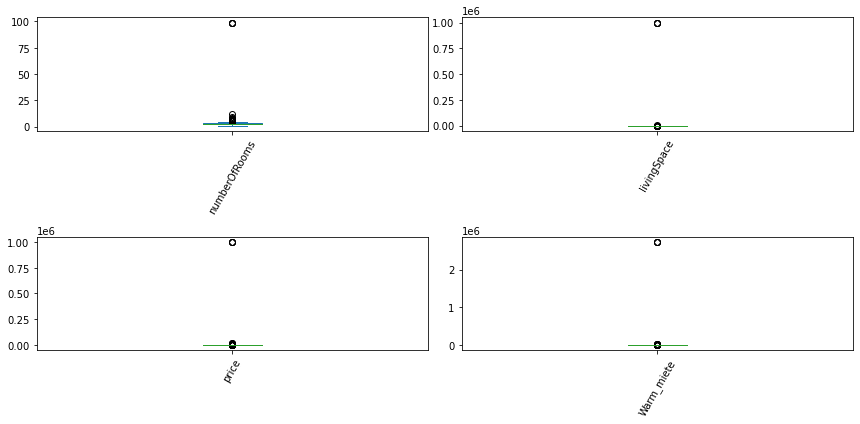

In [29]:
fig, a = plt.subplots(2, 2, figsize=(12, 6), tight_layout=True)
be_float.plot(ax=a, subplots=True, rot=60, kind='box')
plt.show()

In [30]:
Q1 = be_float.quantile(0.25)
Q3 = be_float.quantile(0.75)
IQR = Q3 - Q1

df_out = be_float[((be_float< (Q1 - 1.5 * IQR)) | (be_float> (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)
print(len(df_out.index)/len(be.index)*100)

(97, 4)
10.813823857302118


In [31]:
be = be.drop(df_out.index)


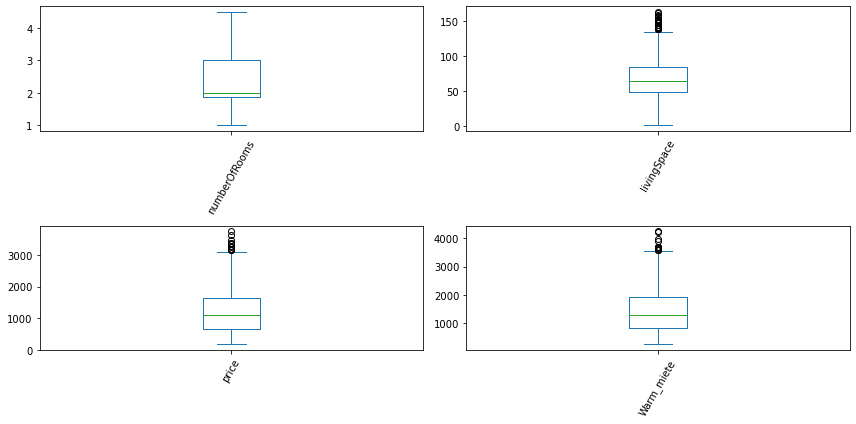

In [32]:
be_float = be.select_dtypes(include=['float64'])
fig, a = plt.subplots(2, 2, figsize=(12, 6), tight_layout=True)
be_float.plot(ax=a, subplots=True, rot=60, kind='box')
plt.show()

Finally I'll create a new column to store the cold rent per square metres: "rent/m2":

In [33]:
be['rent/m2'] = be['price']/be['livingSpace']

I will also round up the apartment with half rooms to nearest whole number:

In [34]:
be['numberOfRooms'].value_counts()

2.0    298
3.0    209
1.0    174
4.0     59
1.5     26
2.5     22
3.5      9
4.5      3
Name: numberOfRooms, dtype: int64

In [35]:
be['numberOfRooms'] = np.ceil(be['numberOfRooms'])

It appears that there is one extreme value. I'll remove that check it again:

In [38]:
be = be[be['rent/m2']<800]

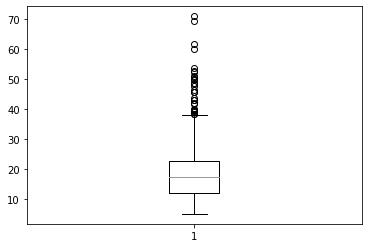

In [37]:
plt.boxplot(be['rent/m2'])
plt.show()

In [39]:
be.describe()

,postcode,numberOfRooms,livingSpace,price,Warm_miete,rent/m2
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,12014.675845,2.254068,68.409312,1241.462340,1467.176446,18.709302
std,1318.555809,0.903505,28.902779,717.993224,792.908475,9.200728
min,10115.000000,1.000000,10.800000,167.170000,257.170000,4.960000
25%,10627.000000,2.000000,48.950000,660.000000,826.500000,11.999578
50%,12349.000000,2.000000,64.390000,1095.630000,1300.000000,17.391304
75%,13125.000000,3.000000,84.400000,1650.000000,1919.500000,22.502141
max,14199.000000,5.000000,163.000000,3750.000000,4240.000000,70.952381


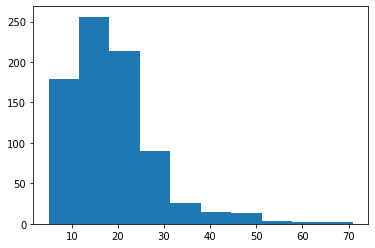

In [40]:
plt.hist(be['rent/m2'])
plt.show()

Now these columns look much better.

In [41]:
be.to_csv(".../berlin_clean.csv")

Let's start with the analysis. You can find my detailed analysis on my blog. 

Let's list the boroughs and quarters by rent per square metre:

In [42]:
be.groupby('bezirk')['rent/m2'].mean()

bezirk
Charlottenburg      22.714137
Friedrichshain      24.330316
Hellersdorf          9.624387
Hohenschönhausen    12.384969
Kreuzberg           23.228160
Köpenick            18.192657
Lichtenberg         18.606968
Marzahn              9.902650
Mitte               31.977820
Neukölln            14.433815
Pankow              15.662941
Prenzlauer Berg     23.178138
Reinickendorf       16.030453
Schöneberg          22.728258
Spandau             12.419287
Steglitz            16.961295
Tempelhof           13.605043
Tiergarten          24.304710
Treptow             16.324458
Wedding             16.741971
Weißensee           14.155682
Wilmersdorf         20.992460
Zehlendorf          16.188078
Name: rent/m2, dtype: float64

In [43]:
be.groupby('quarter')['rent/m2'].mean()

quarter
Adlershof               15.763395
Alt-Hohenschönhausen    13.990850
Baumschulenweg          10.339473
Biesdorf                14.335416
Blankenburg             18.461538
                          ...    
Wedding                 16.741971
Weißensee               15.183867
Wilmersdorf             21.174904
Wittenau                15.311399
Zehlendorf              15.248547
Name: rent/m2, Length: 70, dtype: float64

In [44]:
be.groupby('garden')['price'].mean()

garden
False    1218.472260
True     1358.694198
Name: price, dtype: float64

In [45]:
stats.pointbiserialr(be['price'], be.garden)

PointbiserialrResult(correlation=0.07235102081132562, pvalue=0.0408948252829495)

In [46]:
stats.pointbiserialr(be['rent/m2'], be.balcony)

PointbiserialrResult(correlation=-0.09261665771213783, pvalue=0.00880612550459533)

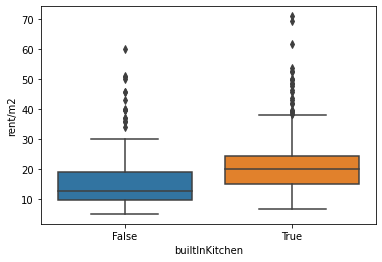

In [47]:
sns.boxplot(y=be['rent/m2'], x=be['builtInKitchen'])
plt.show()

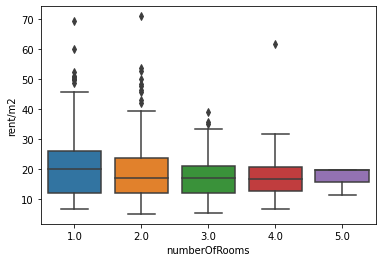

In [48]:
sns.boxplot(y=be['rent/m2'], x=be['numberOfRooms'])
plt.show()

In [49]:
stats.pearsonr(be['rent/m2'], be['numberOfRooms'])

(-0.14922158648429032, 2.2843490240481522e-05)

In [50]:
be.groupby('numberOfRooms')['rent/m2'].mean()

numberOfRooms
1.0    21.175505
2.0    18.894904
3.0    16.910246
4.0    17.739238
5.0    16.961857
Name: rent/m2, dtype: float64

In [51]:
be.groupby('numberOfRooms')['price'].mean()

numberOfRooms
1.0     719.656243
2.0    1187.524784
3.0    1486.195671
4.0    1946.450735
5.0    2333.333333
Name: price, dtype: float64

In [52]:
be.groupby('builtInKitchen')['price'].mean()

builtInKitchen
False     972.577276
True     1423.920063
Name: price, dtype: float64

In [53]:
stats.pointbiserialr(be['price'], be.balcony)

PointbiserialrResult(correlation=0.20941014807940062, pvalue=2.280819534796315e-09)